Heart disease prediction using Machine learning model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
dataset = pd.read_csv('heart_2020_cleaned.csv')

# Exploratory Data Analysis 

In [3]:
#1. Shape of dataset.It describe structure of dataset.We can see that dataset as 319795 observations and 18 features
dataset.shape

(319795, 18)

In [4]:
#2. Datatypes of all columns/features
dataset.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [60]:
# we will also use dataset.info() command which shows count of datatypes avaliable.In this case 4 features are of type numerical(float) and 14 features are categorical(object)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [61]:
# 3. Display dataset
dataset.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [7]:
dataset.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,No,31.93,No,Yes,No,0.0,0.0,No,Male,65-69,Hispanic,No,Yes,Good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319787,No,36.54,No,No,No,7.0,0.0,No,Male,30-34,Hispanic,No,No,Good,9.0,No,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [62]:
dataset.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<AxesSubplot:>

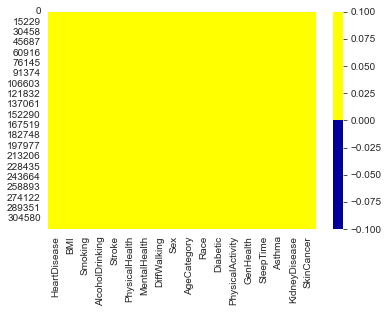

In [146]:
# Missing value imputation
import seaborn as sns
cols = dataset.columns 
colurs = ['#0099', '#ff00'] # specify the colours - yellow is not missing. blue is missing.
sns.heatmap(dataset[cols].isnull(), cmap=sns.cols_palette(colours))

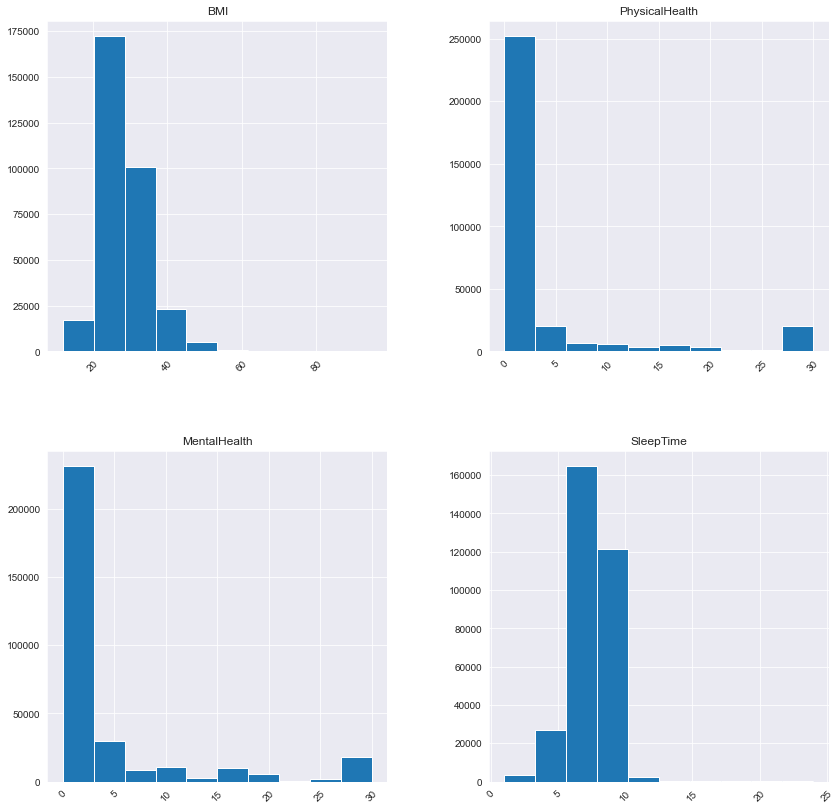

In [65]:

dataset.hist(figsize=(14,14), xrot=45)
plt.show()

In [10]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


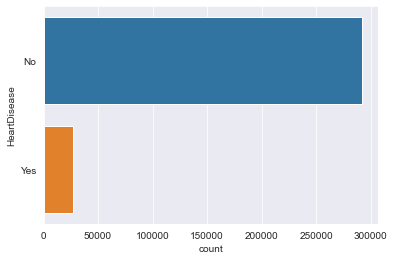

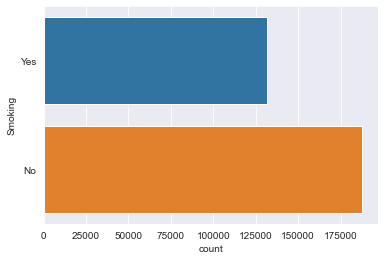

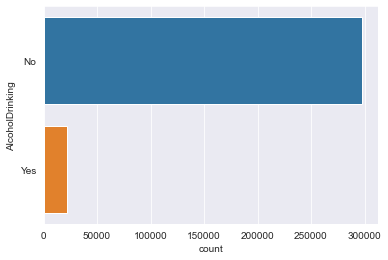

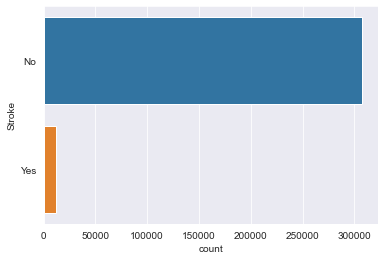

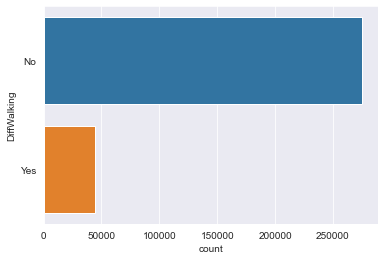

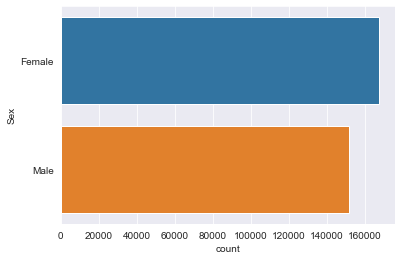

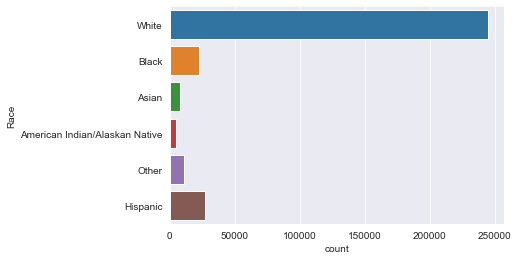

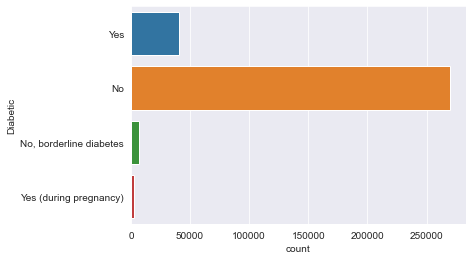

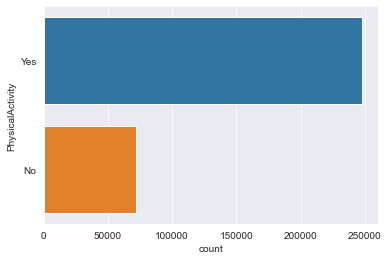

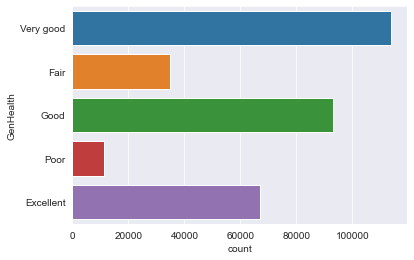

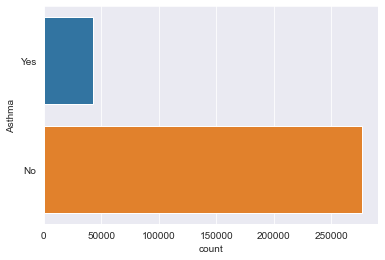

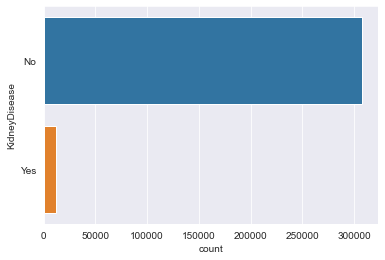

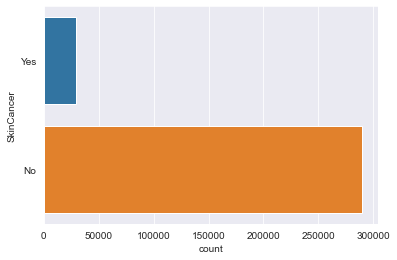

In [17]:
for column in dataset.select_dtypes(include='obj'):
    if dataset[colmn].unique() < 100:
        sns.countplot(y=column, data=dataset1)
        plt.show()

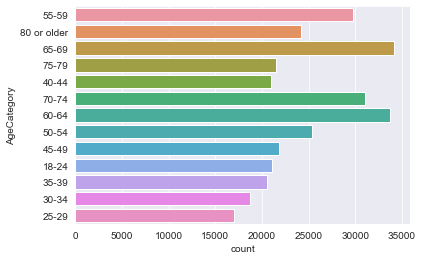

In [18]:
for column in dataset.select_dtypes(include='object'):
    if dataset[column].nunique() > 10:
        sns.countplot(y=column, data=dataset)
        plt.show()

In [6]:
for column in dataset.select_dtypes(include='object'):
    if dataset[column].nunique() < 10:
        display(dataset.groupby(column).mean())

,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,,,,
No,28.224658,2.956416,3.828778,7.093416
Yes,29.401592,7.808242,4.641764,7.136156


,BMI,PhysicalHealth,MentalHealth,SleepTime
Smoking,,,,
No,28.202278,2.603240,3.330741,7.133575
Yes,28.500768,4.466302,4.706879,7.045084


,BMI,PhysicalHealth,MentalHealth,SleepTime
AlcoholDrinking,,,,
No,28.392092,3.408794,3.788087,7.099041
Yes,27.412704,2.864215,5.407540,7.070166


,BMI,PhysicalHealth,MentalHealth,SleepTime
Stroke,,,,
No,28.300559,3.155970,3.825159,7.093690
Yes,28.958727,8.872483,5.764935,7.183362


,BMI,PhysicalHealth,MentalHealth,SleepTime
DiffWalking,,,,
No,27.861671,2.003965,3.412030,7.109886
Yes,31.200961,11.853051,6.914118,7.017631


,BMI,PhysicalHealth,MentalHealth,SleepTime
Sex,,,,
Female,28.162436,3.681225,4.655916,7.118536
Male,28.505317,3.029989,3.061991,7.073380


,BMI,PhysicalHealth,MentalHealth,SleepTime
Race,,,,
American Indian/Alaskan Native,29.627678,4.791042,5.036332,7.056709
Asian,25.218303,1.630640,2.755454,6.918691
Black,30.169993,3.696935,4.211561,6.992763
Hispanic,28.818086,3.227137,4.188297,7.035014
Other,28.748967,4.052343,5.225750,6.860359
White,28.153422,3.354310,3.790924,7.131054


,BMI,PhysicalHealth,MentalHealth,SleepTime
Diabetic,,,,
No,27.754661,2.845535,3.787382,7.096769
"No, borderline diabetes",30.451413,4.529715,4.495945,7.029199
Yes,31.707582,6.660948,4.428410,7.122077
Yes (during pregnancy),28.905569,3.303243,5.558421,6.910512


,BMI,PhysicalHealth,MentalHealth,SleepTime
PhysicalActivity,,,,
No,30.103974,6.802876,5.314374,7.086806
Yes,27.810110,2.377634,3.488121,7.100050


,BMI,PhysicalHealth,MentalHealth,SleepTime
GenHealth,,,,
Excellent,26.099836,0.695341,2.167006,7.205514
Fair,30.646690,10.297258,7.350146,6.928569
Good,29.495961,2.904541,4.064094,7.066327
Poor,30.402139,22.986536,11.886350,6.848791
Very good,27.761608,1.270952,2.935938,7.134501


,BMI,PhysicalHealth,MentalHealth,SleepTime
Asthma,,,,
No,28.094452,3.002853,3.541508,7.124334
Yes,29.817149,5.754269,6.203419,6.920997


,BMI,PhysicalHealth,MentalHealth,SleepTime
KidneyDisease,,,,
No,28.262296,3.150619,3.840369,7.095323
Yes,29.975492,9.153154,5.414976,7.142881


,BMI,PhysicalHealth,MentalHealth,SleepTime
SkinCancer,,,,
No,28.393972,3.265391,3.983602,7.078072
Yes,27.658550,4.405614,3.069486,7.281867


In [ ]:
#10. Correlations matrix for the different numerical features
A correlation is a value between -1 and 1 that amounts to how closely values of two separate features move simultaneously. A positive correlation means that as one feature increases the other one also increases, while a negative correlation means one feature increases as the other decreases. Correlations close to 0 indicate a weak relationship while closer to -1 or 1 signifies a strong relationship.



In [36]:
corrs = dataset.corr()
corrs

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [ ]:
# Heatmap of the correlations

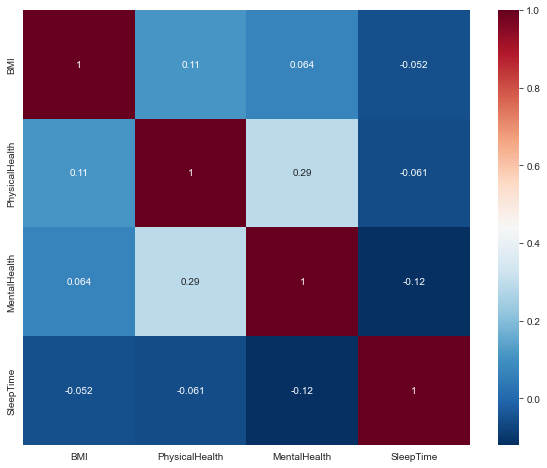

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

# Data cleaning Phase

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
dataset1=dataset

In [6]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.Labelncoder()
  
# Encode labels in column 'HeartDisease'.
dataset1['HeartDisease']= label_ecoder.fit_transform(dataset1['HeartDisease'])


array([0, 1])

In [9]:
dataset1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [10]:
dataset.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,1,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,0,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,0,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,0,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,0,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [11]:
dataset1['Smoking']= label_ecoder.fit_transform(dataset['Smoking'])
dataset1['AlcoholDrinking']= label_ecoder.fit_transform(dataset['AlcoholDrinking'])
dataset1['Stroke']= label_ecoder.fit_transform(dataset['Stroke'])



In [12]:
dataset1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,0,0,1,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,1,0,0,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,0,0,0,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,0,0,0,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,1,0,0,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,0,0,0,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,0,0,0,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [13]:
dataset1['DiffWalking']= label_encoder.fit_transform(dataset1['DiffWalking'])
dataset1['Sex']= label_encoder.fit_transform(dataset1['Sex'])
dataset1['Diabetic']= label_encoder.fit_transform(dataset1['Diabetic'])
dataset1['PhysicalActivity']= label_encoder.fit_transform(dataset1['PhysicalActivity'])
dataset1['GenHealth']= label_encoder.fit_transform(dataset1['GenHealth'])
dataset1['Asthma']= label_encoder.fit_transform(dataset1['Asthma'])
dataset1['KidneyDisease']= label_encoder.fit_transform(dataset1['KidneyDisease'])
dataset1['SkinCancer']= label_encoder.fit_transform(dataset1['SkinCancer'])


In [16]:
dataset1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [36]:
#dataset1 = pd.get_dummies(dataset1, columns = ['Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'])

In [19]:
dataset1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,27.41,1.0,0.0,0.0,7.0,0.0,1.0,1.0,8.0,3.0,2.0,0.0,1.0,6.0,1.0,0.0,0.0
319791,0.0,29.84,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,4.0,5.0,1.0,0.0,0.0
319792,0.0,24.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0
319793,0.0,32.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0


In [20]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'HeartDisease'.
dataset1['AgeCategory']= label_encoder.fit_transform(dataset1['AgeCategory'])
  
dataset1['AgeCategory'].unique()

array([ 7, 12,  9, 11,  4, 10,  8,  6,  5,  0,  3,  2,  1], dtype=int64)

In [21]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Race'.
dataset1['Race']= label_encoder.fit_transform(dataset1['Race'])
  
dataset1['Race'].unique()

array([5, 2, 1, 0, 4, 3], dtype=int64)

In [22]:
dataset1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7,5,2.0,1.0,4.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12,5,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9,5,2.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,5,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4,5,0.0,1.0,4.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,27.41,1.0,0.0,0.0,7.0,0.0,1.0,1.0,8,3,2.0,0.0,1.0,6.0,1.0,0.0,0.0
319791,0.0,29.84,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3,0.0,1.0,4.0,5.0,1.0,0.0,0.0
319792,0.0,24.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,0.0,1.0,2.0,6.0,0.0,0.0,0.0
319793,0.0,32.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,0.0,0.0,2.0,12.0,0.0,0.0,0.0


In [26]:
cols = ['AgeCategory','Race']
dataset1[cols]= dataset1[cols].astype('float')
dataset1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,27.41,1.0,0.0,0.0,7.0,0.0,1.0,1.0,8.0,3.0,2.0,0.0,1.0,6.0,1.0,0.0,0.0
319791,0.0,29.84,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,4.0,5.0,1.0,0.0,0.0
319792,0.0,24.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0
319793,0.0,32.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0


In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
# apply normalization techniques
for column in dataset1.columns:
    dataset1[column] = (dataset1[column] - dataset1[column].min()) / (dataset1[column].max() - dataset1[column].min())    
  
# view normalized data
print(dataset1)

        HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                0.0  0.055294      1.0              0.0     0.0   
1                0.0  0.100447      0.0              0.0     1.0   
2                0.0  0.175782      1.0              0.0     0.0   
3                0.0  0.147169      0.0              0.0     0.0   
4                0.0  0.141132      0.0              0.0     0.0   
...              ...       ...      ...              ...     ...   
319790           1.0  0.185802      1.0              0.0     0.0   
319791           0.0  0.215139      1.0              0.0     0.0   
319792           0.0  0.147531      0.0              0.0     0.0   
319793           0.0  0.250996      0.0              0.0     0.0   
319794           0.0  0.416999      0.0              0.0     0.0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Race  \
0             0.100000           1.0          0.0  0.0     0.583333   1.0   
1             0.000000       

In [30]:
dataset1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,0.666667,1.0,1.00,0.173913,1.0,0.0,1.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.260870,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,0.666667,1.0,0.25,0.304348,1.0,0.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,1.0,0.000000,1.0,1.00,0.304348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.6,0.666667,0.0,0.25,0.217391,1.0,0.0,0.0
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.6,0.000000,1.0,1.00,0.173913,1.0,0.0,0.0
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0


In [32]:
dataset1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,0.666667,1.0,1.00,0.173913,1.0,0.0,1.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.260870,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,0.666667,1.0,0.25,0.304348,1.0,0.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,1.0,0.000000,1.0,1.00,0.304348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.6,0.666667,0.0,0.25,0.217391,1.0,0.0,0.0
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.6,0.000000,1.0,1.00,0.173913,1.0,0.0,0.0
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0


# Perform feature engineering

In [35]:
#install the package
!pip install ppscore

    ERROR: Command errored out with exit status 1:


  Using cached ppscore-1.2.0.tar.gz (47 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Using legacy 'setup.py install' for ppscore, since package 'wheel' is not installed.
Failed to build scikit-learn



     command: 'C:\Users\admin\AppData\Local\Programs\Python\Python310\python.exe' 'C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' prepare_metadata_for_build_wheel 'C:\Users\admin\AppData\Local\Temp\tmpz2hp8k1w'
         cwd: C:\Users\admin\AppData\Local\Temp\pip-install-h9vog1s_\scikit-learn_73af874aa76f431db6be3401aa79725f
    Complete output (46 lines):
    Partial import of sklearn during the build process.
    INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    Traceback (most recent call last):
      File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 349, in <module>
        main()
      File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 331, in main
        json_out['return_val'] = hook(**hook_input['kwa

In [ ]:
import ppscore as pps
pps.score(dataset1, "Smoking", "HeartDisease")

In [34]:
#calculate the whole PPS matrix
matrix_pps=pps.matrix(dataset1)
matrix_pps

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,HeartDisease,HeartDisease,1.0,predict_itself,True,None,0.000000,1.000000,None
1,HeartDisease,BMI,0.0,regression,True,mean absolute error,4.624818,4.693681,DecisionTreeRegressor()
2,HeartDisease,Smoking,0.0,regression,True,mean absolute error,0.410600,0.479598,DecisionTreeRegressor()
3,HeartDisease,AlcoholDrinking,0.0,regression,True,mean absolute error,0.068000,0.126485,DecisionTreeRegressor()
4,HeartDisease,Stroke,0.0,regression,True,mean absolute error,0.032800,0.061556,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
319,SkinCancer,GenHealth,0.0,regression,True,mean absolute error,1.271400,1.319615,DecisionTreeRegressor()
320,SkinCancer,SleepTime,0.0,regression,True,mean absolute error,0.982800,0.998471,DecisionTreeRegressor()
321,SkinCancer,Asthma,0.0,regression,True,mean absolute error,0.128600,0.224197,DecisionTreeRegressor()
322,SkinCancer,KidneyDisease,0.0,regression,True,mean absolute error,0.033800,0.065292,DecisionTreeRegressor()


In [38]:
corrs = dataset1.corr()
corrs

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


# Univariate Feature Selection 

In [37]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
# array = dataset1.values
X = dataset1.iloc[:,1:18]
Y = dataset1.iloc[:,0]

In [39]:
dataset1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,0.666667,1.0,1.00,0.173913,1.0,0.0,1.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.260870,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,0.666667,1.0,0.25,0.304348,1.0,0.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,1.0,0.000000,1.0,1.00,0.304348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.6,0.666667,0.0,0.25,0.217391,1.0,0.0,0.0
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.6,0.000000,1.0,1.00,0.173913,1.0,0.0,0.0
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0


In [89]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5.0,1.0,0.0,1.0
1,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,8.0,1.0,0.0,0.0
3,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1.0,0.0,0.0,7.0,0.0,1.0,1.0,8.0,3.0,2.0,0.0,1.0,6.0,1.0,0.0,0.0
319791,29.84,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,4.0,5.0,1.0,0.0,0.0
319792,24.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0
319793,32.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0


In [40]:
Y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
319790    1.0
319791    0.0
319792    0.0
319793    0.0
319794    0.0
Name: HeartDisease, Length: 319795, dtype: float64

In [41]:
array_x = X.values
array_y = Y.values

In [42]:
test = SelctKbest(score_fun )
fit = test.fit(array_x, array_y)
set_printoptions()
print(fit.scor_)
features = fit.transform(array_X)

[2.567e+01 2.182e+03 3.067e+02 1.192e+04 5.825e+03 1.415e+02 1.115e+04
 8.232e+02 2.833e+03 2.597e+01 5.175e+03 7.188e+02 1.037e+01 3.260e-01
 4.756e+02 6.494e+03 2.525e+03]


In [44]:
cols = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer']
for i in range(len(fit.score__)):
               print(cols[i]," : ", fit.score__[i])

BMI  :  25.671173454666796
Smoking  :  2181.9530231031317
AlcoholDrinking  :  306.69327027017357
Stroke  :  11922.577647178325
PhysicalHealth  :  5825.050997459233
MentalHealth  :  141.45636693918104
DiffWalking  :  11154.414930638695
Sex  :  823.1956712923966
AgeCategory  :  2832.6158710840054
Race  :  25.96687487508886
Diabetic  :  5175.468799597979
PhysicalActivity  :  718.810142010766
GenHealth  :  10.374181801258523
SleepTime  :  0.3260426416293178
Asthma  :  475.64783537825235
KidneyDisease  :  6493.654142687115
SkinCancer  :  2525.122509296585


In [45]:
Finaldata = dataset

Finaldata

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,0.666667,1.0,1.00,0.173913,1.0,0.0,1.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.260870,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,0.666667,1.0,0.25,0.304348,1.0,0.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.000000,0.0,0.50,0.217391,0.0,0.0,1.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,1.0,0.000000,1.0,1.00,0.304348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.6,0.666667,0.0,0.25,0.217391,1.0,0.0,0.0
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.6,0.000000,1.0,1.00,0.173913,1.0,0.0,0.0
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.6,0.000000,1.0,0.50,0.217391,0.0,0.0,0.0
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.6,0.000000,0.0,0.50,0.478261,0.0,0.0,0.0


In [46]:
Finaldata[Finaldata.columns].round(decimals= 3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055,1.0,0.0,0.0,0.100,1.0,0.0,0.0,0.583,1.0,0.667,1.0,1.00,0.174,1.0,0.0,1.0
1,0.0,0.100,0.0,0.0,1.0,0.000,0.0,0.0,0.0,1.000,1.0,0.000,1.0,1.00,0.261,0.0,0.0,0.0
2,0.0,0.176,1.0,0.0,0.0,0.667,1.0,0.0,1.0,0.750,1.0,0.667,1.0,0.25,0.304,1.0,0.0,0.0
3,0.0,0.147,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.917,1.0,0.000,0.0,0.50,0.217,0.0,0.0,1.0
4,0.0,0.141,0.0,0.0,0.0,0.933,0.0,1.0,0.0,0.333,1.0,0.000,1.0,1.00,0.304,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.186,1.0,0.0,0.0,0.233,0.0,1.0,1.0,0.667,0.6,0.667,0.0,0.25,0.217,1.0,0.0,0.0
319791,0.0,0.215,1.0,0.0,0.0,0.000,0.0,0.0,1.0,0.250,0.6,0.000,1.0,1.00,0.174,1.0,0.0,0.0
319792,0.0,0.148,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.417,0.6,0.000,1.0,0.50,0.217,0.0,0.0,0.0
319793,0.0,0.251,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.083,0.6,0.000,0.0,0.50,0.478,0.0,0.0,0.0


In [47]:


cols=['GenHealth','SleepTime']

Finaldata.drop(cols,axis=1,inplace=True)
#dataset2.drop("anomaly",axis=1,inplace=True)

In [48]:
Finaldata

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,1.0,0.666667,1.0,1.0,0.0,1.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,1.0,0.666667,1.0,1.0,0.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.000000,0.0,0.0,0.0,1.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,1.0,0.000000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,1.0,0.666667,0.6,0.666667,0.0,1.0,0.0,0.0
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.250000,0.6,0.000000,1.0,1.0,0.0,0.0
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.416667,0.6,0.000000,1.0,0.0,0.0,0.0
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.6,0.000000,0.0,0.0,0.0,0.0


In [50]:
# cleaned and complete dataset is ready to use for model building.
Finaldata.to_csv("cleaned_dataset2.csv", index = False)

In [51]:
sampledata = pd.read_csv('cleaned_dataset2.csv')

In [52]:
sampledata

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055,1.0,0.0,0.0,0.100,1.0,0.0,0.0,0.583,1.0,0.667,1.0,1.0,0.0,1.0
1,0.0,0.100,0.0,0.0,1.0,0.000,0.0,0.0,0.0,1.000,1.0,0.000,1.0,0.0,0.0,0.0
2,0.0,0.176,1.0,0.0,0.0,0.667,1.0,0.0,1.0,0.750,1.0,0.667,1.0,1.0,0.0,0.0
3,0.0,0.147,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.917,1.0,0.000,0.0,0.0,0.0,1.0
4,0.0,0.141,0.0,0.0,0.0,0.933,0.0,1.0,0.0,0.333,1.0,0.000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.186,1.0,0.0,0.0,0.233,0.0,1.0,1.0,0.667,0.6,0.667,0.0,1.0,0.0,0.0
319791,0.0,0.215,1.0,0.0,0.0,0.000,0.0,0.0,1.0,0.250,0.6,0.000,1.0,1.0,0.0,0.0
319792,0.0,0.148,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.417,0.6,0.000,1.0,0.0,0.0,0.0
319793,0.0,0.251,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.083,0.6,0.000,0.0,0.0,0.0,0.0


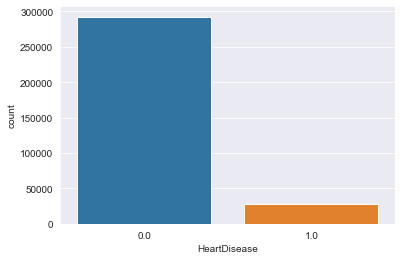

In [53]:
sns.countplot('HeartDisease', data=sampledata)
plt.show()

In [ ]:
# above dataset is cleaned but the fequency of HeartDisease YES(1),NO(0) is imbalanced
#To overcome this imbalance of our cleaned and orignal dataset we will go for sampling
#To overcome this issue we are using here sampling

In [5]:
!pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~klearn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [104]:
conda install -c conda-forge imbalanced-learn

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [7]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


You should consider upgrading via the 'C:\Users\admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

You should consider upgrading via the 'C:\Users\admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached imbalanced_learn-0.6.0-py3-none-any.whl (162 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.9.1
    Uninstalling imbalanced-learn-0.9.1:
      Successfully uninstalled imbalanced-learn-0.9.1
  Using cached scikit-learn-0.22.1.tar.gz (6.9 MB)
Using legacy 'setup.py install' for scikit-learn, since package 'wheel' is not installed.

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\admin\AppData\Local\Programs\Python\Python310\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-krgsboqm\\scikit-learn_cb19d88f13c14786ae5d96a8e0611248\\setup.py'"'"'; __file__='"'"'C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-krgsboqm\\scikit-learn_cb19d88f13c14786ae5d96a8e0611248\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\admin\AppData\Local\Temp\pip-record-dk8tqnsf\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\Users\admin\AppData\Local\Programs\Python\Python310\Include\scikit-learn'
         cwd: C:\Users\admin\AppData\Local\Te


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\admin\appdata\local\programs\python\python310\lib\site-packages\scikit_learn-1.1.1.dist-info\
   from C:\Users\admin\AppData\Local\Programs\Python\Python310\Lib\site-packages\~cikit_learn-1.1.1.dist-info
  Moving to c:\users\admin\appdata\local\programs\python\python310\lib\site-packages\sklearn\
   from C:\Users\admin\AppData\Local\Programs\Python\Python310\Lib\site-packages\~-learn


    Partial import of sklearn during the build process.
    Traceback (most recent call last):
      File "C:\Users\admin\AppData\Local\Temp\pip-install-krgsboqm\scikit-learn_cb19d88f13c14786ae5d96a8e0611248\sklearn\_build_utils\__init__.py", line 32, in _check_cython_version
        import Cython
    ModuleNotFoundError: No module named 'Cython'
    
    During handling of the above exception, another exception occurred:
    
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\admin\AppData\Local\Temp\pip-install-krgsboqm\scikit-learn_cb19d88f13c14786ae5d96a8e0611248\setup.py", line 303, in <module>
        setup_package()
      File "C:\Users\admin\AppData\Local\Temp\pip-install-krgsboqm\scikit-learn_cb19d88f13c14786ae5d96a8e0611248\setup.py", line 299, in setup_package
        setup(**metadata)
      File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\distutils\core.py", line 135, in setup
        co

In [10]:
!pip install imblearn

You should consider upgrading via the 'C:\Users\admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [54]:
sample_over=sampledata.copy()

In [55]:
sample_over

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055,1.0,0.0,0.0,0.100,1.0,0.0,0.0,0.583,1.0,0.667,1.0,1.0,0.0,1.0
1,0.0,0.100,0.0,0.0,1.0,0.000,0.0,0.0,0.0,1.000,1.0,0.000,1.0,0.0,0.0,0.0
2,0.0,0.176,1.0,0.0,0.0,0.667,1.0,0.0,1.0,0.750,1.0,0.667,1.0,1.0,0.0,0.0
3,0.0,0.147,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.917,1.0,0.000,0.0,0.0,0.0,1.0
4,0.0,0.141,0.0,0.0,0.0,0.933,0.0,1.0,0.0,0.333,1.0,0.000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.186,1.0,0.0,0.0,0.233,0.0,1.0,1.0,0.667,0.6,0.667,0.0,1.0,0.0,0.0
319791,0.0,0.215,1.0,0.0,0.0,0.000,0.0,0.0,1.0,0.250,0.6,0.000,1.0,1.0,0.0,0.0
319792,0.0,0.148,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.417,0.6,0.000,1.0,0.0,0.0,0.0
319793,0.0,0.251,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.083,0.6,0.000,0.0,0.0,0.0,0.0


In [56]:
from imblearn.over_sampling import Randomoversampler

y = sample_over['HeartDisease']
x = sample_over.drop(['HeartDisease'])

In [57]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
319790    1.0
319791    0.0
319792    0.0
319793    0.0
319794    0.0
Name: HeartDisease, Length: 319795, dtype: float64

In [58]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0.055,1.0,0.0,0.0,0.100,1.0,0.0,0.0,0.583,1.0,0.667,1.0,1.0,0.0,1.0
1,0.100,0.0,0.0,1.0,0.000,0.0,0.0,0.0,1.000,1.0,0.000,1.0,0.0,0.0,0.0
2,0.176,1.0,0.0,0.0,0.667,1.0,0.0,1.0,0.750,1.0,0.667,1.0,1.0,0.0,0.0
3,0.147,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.917,1.0,0.000,0.0,0.0,0.0,1.0
4,0.141,0.0,0.0,0.0,0.933,0.0,1.0,0.0,0.333,1.0,0.000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.186,1.0,0.0,0.0,0.233,0.0,1.0,1.0,0.667,0.6,0.667,0.0,1.0,0.0,0.0
319791,0.215,1.0,0.0,0.0,0.000,0.0,0.0,1.0,0.250,0.6,0.000,1.0,1.0,0.0,0.0
319792,0.148,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.417,0.6,0.000,1.0,0.0,0.0,0.0
319793,0.251,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.083,0.6,0.000,0.0,0.0,0.0,0.0


In [59]:
from imblearn.over_sampling 
y1 = sample_over['HeartDisease']
X1 = sample_over.drop(['HeartDisease'])

In [60]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x1, y1)

In [61]:
print('original dataset shape:', counter(x1))

original dataset shape: Counter({0.0: 292422, 1.0: 27373})


In [62]:
print('Over Sampled dataset shape:', counter(y1))

Over Sampled dataset shape: Counter({0.0: 292422, 1.0: 292422})


In [63]:
y_ros

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
584839    1.0
584840    1.0
584841    1.0
584842    1.0
584843    1.0
Name: HeartDisease, Length: 584844, dtype: float64

In [64]:
x_ros

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0.055,1.0,0.0,0.0,0.100,1.0,0.0,0.0,0.583,1.0,0.667,1.0,1.0,0.0,1.0
1,0.100,0.0,0.0,1.0,0.000,0.0,0.0,0.0,1.000,1.0,0.000,1.0,0.0,0.0,0.0
2,0.176,1.0,0.0,0.0,0.667,1.0,0.0,1.0,0.750,1.0,0.667,1.0,1.0,0.0,0.0
3,0.147,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.917,1.0,0.000,0.0,0.0,0.0,1.0
4,0.141,0.0,0.0,0.0,0.933,0.0,1.0,0.0,0.333,1.0,0.000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,0.264,1.0,1.0,0.0,1.000,0.5,1.0,0.0,0.917,1.0,0.000,0.0,0.0,0.0,0.0
584840,0.297,1.0,0.0,0.0,0.000,0.0,1.0,0.0,0.917,1.0,0.000,1.0,1.0,0.0,0.0
584841,0.186,0.0,0.0,1.0,0.000,0.0,0.0,0.0,1.000,1.0,0.000,0.0,0.0,1.0,0.0
584842,0.264,1.0,0.0,1.0,0.000,0.0,1.0,1.0,0.750,0.8,0.667,1.0,0.0,0.0,0.0


In [65]:
df1 = pd.DataFrame(x_ros)

df1['HeartDisease'] = y_ros
  
# Observe the result
df1

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0.055,1.0,0.0,0.0,0.100,1.0,0.0,0.0,0.583,1.0,0.667,1.0,1.0,0.0,1.0,0.0
1,0.100,0.0,0.0,1.0,0.000,0.0,0.0,0.0,1.000,1.0,0.000,1.0,0.0,0.0,0.0,0.0
2,0.176,1.0,0.0,0.0,0.667,1.0,0.0,1.0,0.750,1.0,0.667,1.0,1.0,0.0,0.0,0.0
3,0.147,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.917,1.0,0.000,0.0,0.0,0.0,1.0,0.0
4,0.141,0.0,0.0,0.0,0.933,0.0,1.0,0.0,0.333,1.0,0.000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,0.264,1.0,1.0,0.0,1.000,0.5,1.0,0.0,0.917,1.0,0.000,0.0,0.0,0.0,0.0,1.0
584840,0.297,1.0,0.0,0.0,0.000,0.0,1.0,0.0,0.917,1.0,0.000,1.0,1.0,0.0,0.0,1.0
584841,0.186,0.0,0.0,1.0,0.000,0.0,0.0,0.0,1.000,1.0,0.000,0.0,0.0,1.0,0.0,1.0
584842,0.264,1.0,0.0,1.0,0.000,0.0,1.0,1.0,0.750,0.8,0.667,1.0,0.0,0.0,0.0,1.0


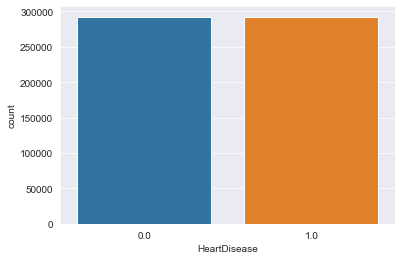

In [85]:
sns.countplot('HeartDisease', data=df1)
plt.show()

In [86]:
df1.to_csv("OverSampled_30May.csv", index = False)

In [1]:
import pandas as pd
import numpy as np
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline # For setting up pipeline
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv('OverSampled_30May.csv')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


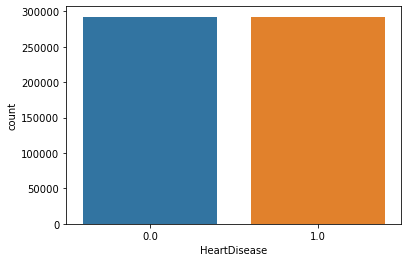

In [4]:
sns.countplot('HeartDisease', data=df)
plt.show()

In [5]:
y = df['HeartDisease']
X = df.drop(['HeartDisease'], axis = 1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

# 1.Random Forest

In [7]:
clf = RandomForestClassifier(n_estimators = 100) 

In [8]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     96276
         1.0       0.90      0.99      0.94     96723

    accuracy                           0.94    192999
   macro avg       0.94      0.94      0.94    192999
weighted avg       0.94      0.94      0.94    192999



In [10]:
print('Random Forest Accuracy:Test Data :',clf.score(X_test,y_test))

Random Forest Accuracy:Test Data : 0.9401603117114596


In [11]:
print('Random Forest Accuracy:Training Data :',clf.score(X_train,y_train))

Random Forest Accuracy:Training Data : 0.9778994245173475


# 2.Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [13]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93     96276
         1.0       0.89      0.99      0.94     96723

    accuracy                           0.93    192999
   macro avg       0.94      0.93      0.93    192999
weighted avg       0.94      0.93      0.93    192999



In [15]:
print('Decision Tree Accuracy:Test Data :',dt.score(X_test,y_test))

Decision Tree Accuracy:Test Data : 0.9319530153005974


In [16]:
print('Decision Tree Accuracy:Training Data :',dt.score(X_train,y_train))

Decision Tree Accuracy:Training Data : 0.9779070806058519
